In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../Data/Selenium/Data.csv')

In [3]:
df.head()

,Player,Tackles,Inter,Clear,Blocks,SpG,KeyP,Drb,Fouled,PS%,...,LongB,ThrB,CF,WF,AM,WM,CM,DM,FB,CB
0,Kevin De Bruyne Man City,0.9,0.2,0.4,0.1,2.2,3.2,1.0,0.8,79.5,...,2.5,0.4,1,0,0,1,1,0,0,0
1,Kieran Trippier Newcastle,2.0,1.3,1.9,0.4,0.4,2.9,0.5,0.9,74.7,...,3.4,0.2,0,0,0,1,0,0,1,0
2,Gabriel Jesus Arsenal,1.2,0.5,0.5,0.1,3.3,1.4,2.0,2.4,82.3,...,0.5,0.1,1,1,0,0,0,0,0,0
3,Erling Haaland Man City,0.1,0.1,0.4,0.1,3.5,0.8,0.2,0.7,75.6,...,0.0,0.1,1,0,0,0,0,0,0,0
4,Harry Kane Tottenham,0.3,0.1,0.4,0.2,3.6,1.5,1.2,1.4,72.2,...,1.9,0.2,1,0,1,0,0,0,0,0


In [4]:
X = df.iloc[:, 1:13]

In [5]:
y = df.iloc[:, 13:]

In [6]:
X.head()

,Tackles,Inter,Clear,Blocks,SpG,KeyP,Drb,Fouled,PS%,Crosses,LongB,ThrB
0,0.9,0.2,0.4,0.1,2.2,3.2,1.0,0.8,79.5,2.2,2.5,0.4
1,2.0,1.3,1.9,0.4,0.4,2.9,0.5,0.9,74.7,3.8,3.4,0.2
2,1.2,0.5,0.5,0.1,3.3,1.4,2.0,2.4,82.3,0.1,0.5,0.1
3,0.1,0.1,0.4,0.1,3.5,0.8,0.2,0.7,75.6,0.0,0.0,0.1
4,0.3,0.1,0.4,0.2,3.6,1.5,1.2,1.4,72.2,0.2,1.9,0.2


In [7]:
y.head()

,CF,WF,AM,WM,CM,DM,FB,CB
0,1,0,0,1,1,0,0,0
1,0,0,0,1,0,0,1,0
2,1,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0


In [8]:
for i in range(y.shape[1]):
    print("Label {}: {} samples".format(i, sum(y.iloc[:, i])))

Label 0: 415 samples
Label 1: 292 samples
Label 2: 219 samples
Label 3: 436 samples
Label 4: 326 samples
Label 5: 179 samples
Label 6: 387 samples
Label 7: 370 samples


# MinMaxScaling

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
X = scaler.fit_transform(X)

# Train/Test Split

In [12]:
y = y.to_numpy()

In [13]:
X, y

(array([[-0.47178783, -0.98444417, -0.65629024, ...,  4.45346481,
          0.80779645,  4.52786811],
        [ 1.15612136,  1.34514758,  0.59928715, ...,  8.23105085,
          1.52325284,  1.99815644],
        [-0.0278126 , -0.34910097, -0.57258508, ..., -0.50461686,
         -0.78210662,  0.73330061],
        ...,
        [-0.76777132, -1.19622524, -0.82370056, ..., -0.0324186 ,
         -1.02059208,  0.73330061],
        [-0.47178783,  0.70980437,  0.51558199, ..., -0.50461686,
          1.04628191, -0.53155523],
        [-1.0637548 , -0.77266311, -0.99111088, ..., -0.74071599,
         -1.10008723, -0.53155523]]),
 array([[1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 1, 0],
        [1, 1, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64))

In [14]:
from sklearn.model_selection import train_test_split
from skmultilearn.model_selection import iterative_train_test_split

In [15]:
X_train, y_train, X_test, y_test = iterative_train_test_split(X, y, test_size=0.3)

In [16]:
for i in range(y_train.shape[1]):
    print("Label {}: {} samples".format(i, sum(y_train[:, i])))

Label 0: 290 samples
Label 1: 204 samples
Label 2: 153 samples
Label 3: 305 samples
Label 4: 228 samples
Label 5: 125 samples
Label 6: 271 samples
Label 7: 259 samples


In [17]:
for i in range(y_test.shape[1]):
    print("Label {}: {} samples".format(i, sum(y_test[:, i])))

Label 0: 125 samples
Label 1: 88 samples
Label 2: 66 samples
Label 3: 131 samples
Label 4: 98 samples
Label 5: 54 samples
Label 6: 116 samples
Label 7: 111 samples


# Classification

In [18]:
from skmultilearn.problem_transform import LabelPowerset
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import average_precision_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

import matplotlib.pyplot as plt

In [19]:
clfs = [SVC(kernel='poly', probability=True), GaussianNB(), RandomForestClassifier(), GradientBoostingClassifier()]

## Label Powerset

Classifier:  SVC
Hamming Loss:  0.20085227272727274
mAP:  0.6272374536846727
Confusion_matrix:
 [[[294  21]
  [ 36  89]]

 [[331  21]
  [ 50  38]]

 [[338  36]
  [ 43  23]]

 [[196 113]
  [ 26 105]]

 [[315  27]
  [ 84  14]]

 [[382   4]
  [ 45   9]]

 [[195 129]
  [ 34  82]]

 [[325   4]
  [ 34  77]]]


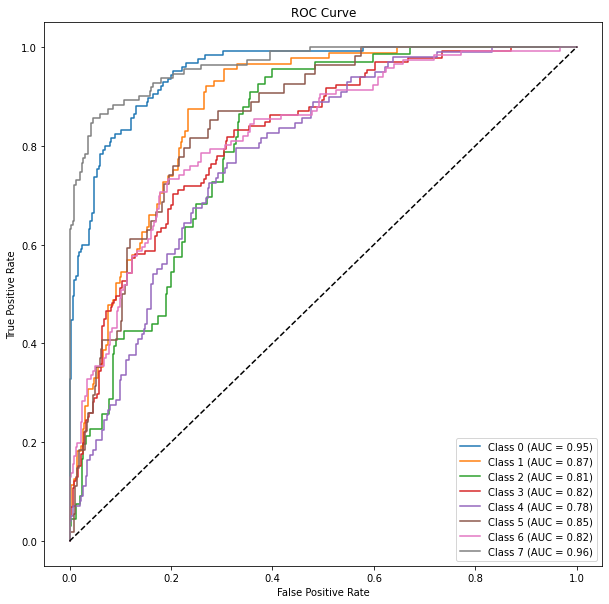

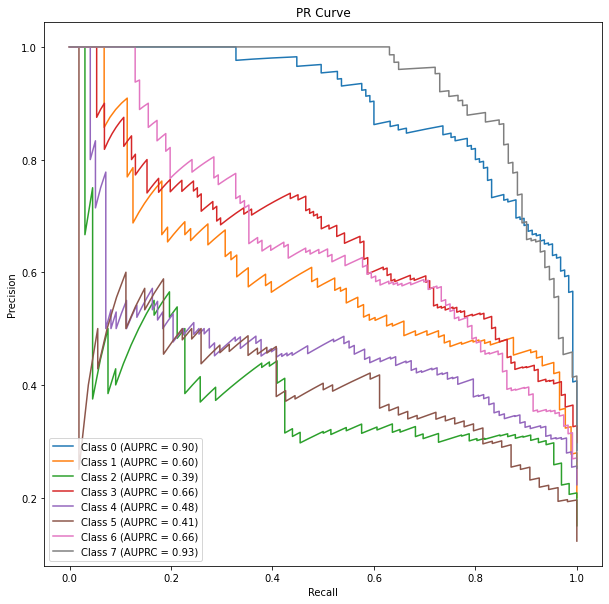

Classifier:  GaussianNB
Hamming Loss:  0.18863636363636363
mAP:  0.5628741580840122
Confusion_matrix:
 [[[277  38]
  [ 26  99]]

 [[319  33]
  [ 53  35]]

 [[354  20]
  [ 50  16]]

 [[235  74]
  [ 63  68]]

 [[284  58]
  [ 54  44]]

 [[365  21]
  [ 35  19]]

 [[276  48]
  [ 48  68]]

 [[304  25]
  [ 18  93]]]


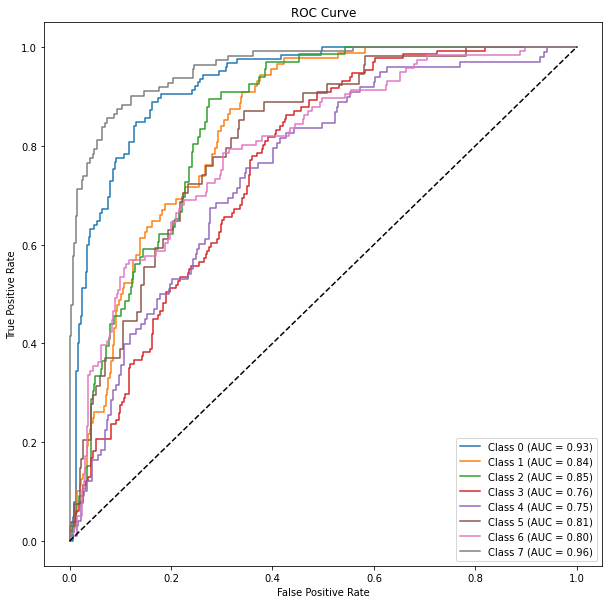

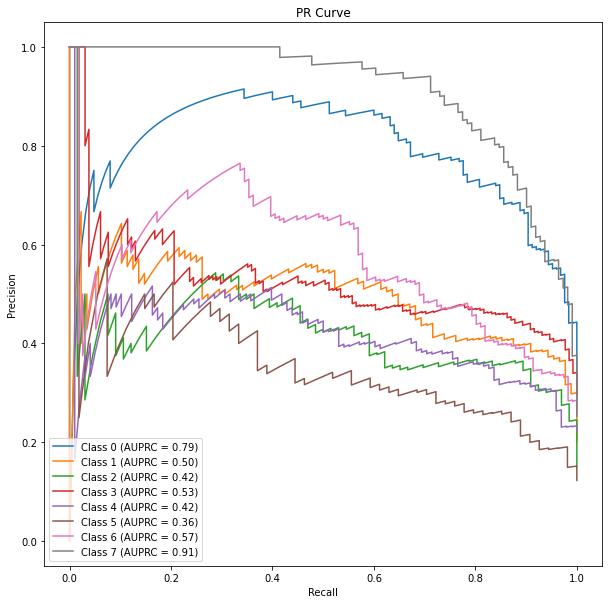

Classifier:  RandomForestClassifier
Hamming Loss:  0.16988636363636364
mAP:  0.662902852748956
Confusion_matrix:
 [[[288  27]
  [ 26  99]]

 [[304  48]
  [ 39  49]]

 [[329  45]
  [ 36  30]]

 [[257  52]
  [ 53  78]]

 [[303  39]
  [ 68  30]]

 [[368  18]
  [ 33  21]]

 [[284  40]
  [ 42  74]]

 [[318  11]
  [ 21  90]]]


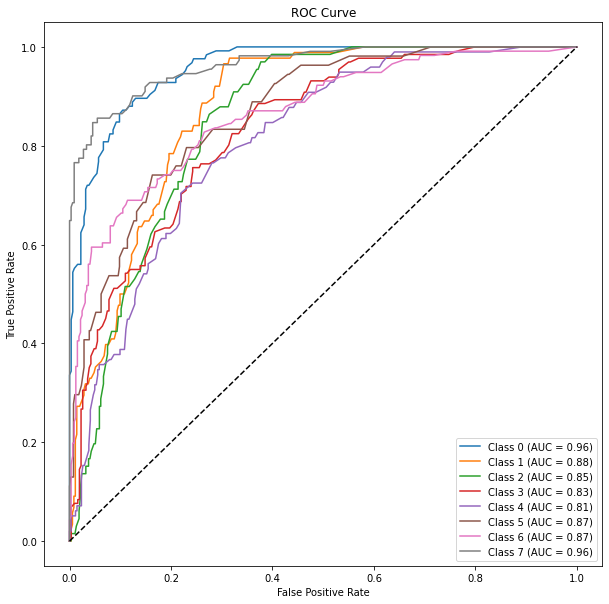

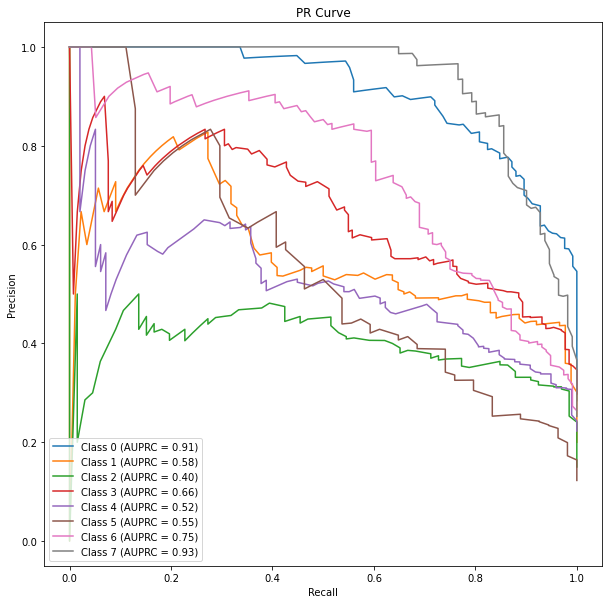

Classifier:  GradientBoostingClassifier
Hamming Loss:  0.18125
mAP:  0.5671558100239161
Confusion_matrix:
 [[[272  43]
  [ 28  97]]

 [[313  39]
  [ 43  45]]

 [[340  34]
  [ 34  32]]

 [[243  66]
  [ 52  79]]

 [[289  53]
  [ 60  38]]

 [[362  24]
  [ 31  23]]

 [[279  45]
  [ 42  74]]

 [[317  12]
  [ 32  79]]]


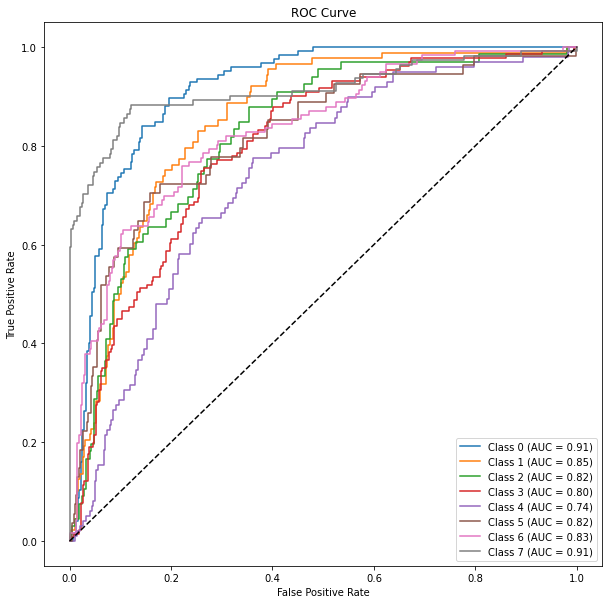

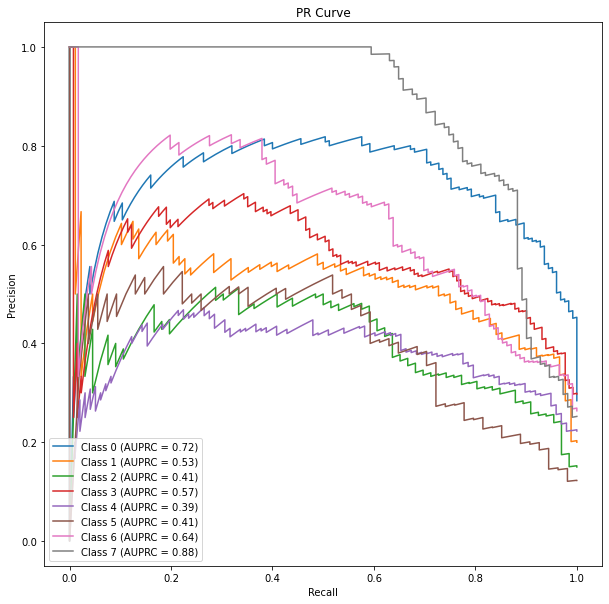

In [20]:
for clf in clfs:
    model = LabelPowerset(clf)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test).toarray()
    y_proba = model.predict_proba(X_test).toarray()
    
    print('Classifier: ', clf.__class__.__name__)
    print('Hamming Loss: ', hamming_loss(y_test, y_pred))
    print('mAP: ', average_precision_score(y_test, y_proba))
    print('Confusion_matrix:\n', multilabel_confusion_matrix(y_test, y_pred))
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(8):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        
    plt.figure(figsize=(10,10))
    for i in range(8):
        plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()
    
    precision = [0 for i in range(8)]
    recall = [0 for i in range(8)]
    ap = [0 for i in range(8)]
    for i in range(8):
        precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_proba[:, i])
        ap[i] = average_precision_score(y_test[:, i], y_proba[:, i])
        
    plt.figure(figsize=(10,10))
    for i in range(8):
        plt.plot(recall[i], precision[i], label=f"Class {i} (AUPRC = {ap[i]:.2f})")
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title("PR Curve")
    plt.legend(loc="lower left")
    plt.show()